<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [ ]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2021-10-06 14:32:38--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  20.0MB/s    in 1.7s    

2021-10-06 14:32:40 (20.0 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
#TODO = train_test_split(#TODO)
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2)

Then a validation set from the train set:




In [ ]:
#TODO = train_test_split(#TODO)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.125)

In [ ]:
print(len(y)) #100%
print(len(y_train)) #70%
print(len(y_val)) #10%
print(len(y_test)) #20%

4485
3139
449
897


Let's KFold over different values of `C`:

In [ ]:
C_values = [0.5, 1, 5, 10, 30, 90, 100, 110, 1000]
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  svm=SVC(C=c)

  # Fit on sub-train set
  svm.fit(X_train, y_train)

  # Evaluate on val set
  acc = svm.score(X_val, y_val)
  accuracies.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with C=0.5
--> accuracy = 0.41648106904231624
Training SVM with C=1
--> accuracy = 0.532293986636971
Training SVM with C=5
--> accuracy = 0.6837416481069042
Training SVM with C=10
--> accuracy = 0.7126948775055679
Training SVM with C=30
--> accuracy = 0.7416481069042317
Training SVM with C=90
--> accuracy = 0.7505567928730512
Training SVM with C=100
--> accuracy = 0.7505567928730512
Training SVM with C=110
--> accuracy = 0.7505567928730512
Training SVM with C=1000
--> accuracy = 0.7438752783964365


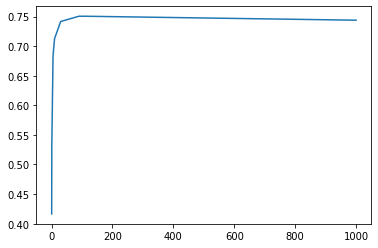

In [ ]:
#TODO plot the relation between `c` and the accuracy
plt.plot(C_values, accuracies)

In [ ]:
#TODO Fit on the whole train set, evaluate on the test set 
svm = SVC(C=30)
svm.fit(X_train_all, y_train_all)
svm.score(X_test, y_test)

0.7079152731326644

Do the same with different kernel values, and different decision functions:

In [ ]:
C_values = [0.5, 1, 5, 10, 30,100]
Kernel = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for c in C_values:
  for k in Kernel : 
    print(f'Training SVM with C={c} et k={k}')
    svm=SVC(C=c, kernel=k)

    # Fit on sub-train set
    svm.fit(X_train, y_train)

    # Evaluate on val set
    acc = svm.score(X_val, y_val)
    accuracies.append({"c_values" : c, "kernel" : k, "accuracy" : acc})

Training SVM with C=0.5 et k=linear
Training SVM with C=0.5 et k=poly
Training SVM with C=0.5 et k=rbf
Training SVM with C=0.5 et k=sigmoid
Training SVM with C=1 et k=linear
Training SVM with C=1 et k=poly
Training SVM with C=1 et k=rbf
Training SVM with C=1 et k=sigmoid
Training SVM with C=5 et k=linear
Training SVM with C=5 et k=poly
Training SVM with C=5 et k=rbf
Training SVM with C=5 et k=sigmoid
Training SVM with C=10 et k=linear
Training SVM with C=10 et k=poly
Training SVM with C=10 et k=rbf
Training SVM with C=10 et k=sigmoid
Training SVM with C=30 et k=linear
Training SVM with C=30 et k=poly
Training SVM with C=30 et k=rbf
Training SVM with C=30 et k=sigmoid
Training SVM with C=100 et k=linear
Training SVM with C=100 et k=poly
Training SVM with C=100 et k=rbf
Training SVM with C=100 et k=sigmoid


In [ ]:
import pandas as pd
pd.DataFrame(accuracies)

,c_values,kernel,accuracy
0,0.5,linear,0.741648
1,0.5,poly,0.316258
2,0.5,rbf,0.416481
3,0.5,sigmoid,0.135857
4,1.0,linear,0.741648
5,1.0,poly,0.385301
6,1.0,rbf,0.532294
7,1.0,sigmoid,0.129176
8,5.0,linear,0.741648
9,5.0,poly,0.512249
